In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import transforms,ToTensor
from tqdm import tqdm

In [3]:
train_mnist = datasets.MNIST(
    'mnist',
    train= True,
    download= True,
    transform= ToTensor()
)

val_mnist = datasets.MNIST(
    'mnist',
    train= False,
    download= True,
    transform= ToTensor()
)

In [4]:
image , labels = train_mnist[2]

4


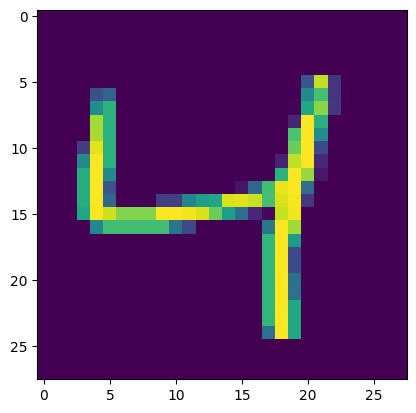

In [5]:
plt.imshow(image.squeeze())
print(labels)

In [6]:
batch_size = 64
train_dataloader = DataLoader(train_mnist,batch_size,shuffle=True)
val_dataloader = DataLoader(val_mnist,batch_size,shuffle=True)

In [7]:
images ,labels = next(iter(train_dataloader))
print(images.shape)
print(labels)
print(labels.shape)

torch.Size([64, 1, 28, 28])
tensor([4, 7, 8, 8, 2, 7, 2, 2, 1, 5, 7, 0, 5, 7, 6, 0, 8, 1, 6, 8, 6, 3, 8, 0,
        1, 2, 0, 5, 7, 4, 7, 2, 4, 3, 4, 7, 4, 2, 0, 6, 0, 1, 4, 4, 9, 7, 9, 8,
        0, 0, 5, 7, 0, 7, 2, 1, 7, 1, 9, 1, 1, 8, 7, 9])
torch.Size([64])


In [8]:
class ANN(nn.Module):
    def __init__(self)->None:
        super().__init__()
        self.fcn=nn.Sequential(
            nn.Flatten(),

            nn.Linear(28*28,512),
            nn.ReLU(inplace=True),

            nn.Linear(512,512),
            nn.ReLU(inplace=True),

            nn.Linear(512,512),
            nn.Softmax()

        )
        
    def forward(self,x):
        return self.fcn(x)

In [9]:
def train(
        model, 
        criteria,
        optimizer,
        train_dataloader,
        val_dataloader,
        epochs,
        device,
        val_iteration=10
        ):
    train_loss = []
    train_accuracy = []
    val_loss=[]
    val_accuracy=[]

    for epoch in range(1,epochs+1):
        #train
        epoch_train_loss=0
        epoch_train_correct = 0
        train_step=0
        model.train()
        for batch_image,batch_labels in tqdm(train_dataloader):
            batch_image=batch_image.to(device)
            batch_labels=batch_labels.to(device)


            optimizer.zero_grad()
            #forward pass
            result=model(batch_image)
            loss= criteria(result,batch_labels)
            _, preds = torch.max(result, 1)
            epoch_train_correct += (preds == batch_labels).sum().item()
            
            loss.backward()
            optimizer.step()
            train_step+=1
            epoch_train_loss +=loss.item()

        epoch_train_loss /= train_step
        train_loss.append(epoch_train_loss)
        epoch_train_accuracy=epoch_train_correct/len(train_dataloader.dataset)
        train_accuracy.append(epoch_train_accuracy)
        print(f'Epoch {epoch} of {epochs}: Loss={epoch_train_loss:.4f}')
        print(f'Epoch {epoch} of {epochs}: accuracy={epoch_train_accuracy:.4f}')

            # Validation
        
        model.eval()
        epoch_val_loss=0
        epoch_val_correct = 0
        val_step = 0
        with torch.no_grad():
            for batch_images, batch_labels in tqdm(val_dataloader):
                batch_images=batch_images.to(device)
                batch_labels=batch_labels.to(device)
                ##Validation only have forward pass no backward pass
                ##forward pass
                results=model(batch_images)
                loss=criteria(results,batch_labels)
                epoch_val_loss+=loss.item()
                val_step+=1
                epoch_val_correct+=(results.argmax(1)==batch_labels).type(torch.float32).sum().item()
                
            epoch_val_loss /= val_step
            val_loss.append(epoch_val_loss)
            epoch_val_accuracy=epoch_val_correct/len(val_dataloader.dataset)
            val_accuracy.append(epoch_val_accuracy)
            print(f'Epoch {epoch} of {epochs}: Val Loss={epoch_val_loss:.4f}')
            print(f'Epoch {epoch} of {epochs}: Val Accuracy={epoch_val_accuracy:.4f}')
    return train_loss,train_accuracy, val_loss, val_accuracy



In [18]:
device='cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [11]:
model=ANN()
model=model.to(device)
epoch=10
criteria=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)


In [12]:
train_loss,train_accuracy,val_loss,val_acc = train(model,criteria,optimizer,train_dataloader,val_dataloader,epoch,device)

  0%|          | 0/938 [00:00<?, ?it/s]c:\Users\sshak\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
100%|██████████| 938/938 [00:08<00:00, 108.76it/s]


Epoch 1 of 10: Loss=5.5239
Epoch 1 of 10: accuracy=0.7237


100%|██████████| 157/157 [00:01<00:00, 149.67it/s]


Epoch 1 of 10: Val Loss=5.3976
Epoch 1 of 10: Val Accuracy=0.8466


100%|██████████| 938/938 [00:09<00:00, 101.59it/s]


Epoch 2 of 10: Loss=5.3759
Epoch 2 of 10: accuracy=0.8673


100%|██████████| 157/157 [00:01<00:00, 107.65it/s]


Epoch 2 of 10: Val Loss=5.3033
Epoch 2 of 10: Val Accuracy=0.9396


100%|██████████| 938/938 [00:11<00:00, 78.58it/s]


Epoch 3 of 10: Loss=5.2886
Epoch 3 of 10: accuracy=0.9540


100%|██████████| 157/157 [00:01<00:00, 148.54it/s]


Epoch 3 of 10: Val Loss=5.2946
Epoch 3 of 10: Val Accuracy=0.9486


100%|██████████| 938/938 [00:09<00:00, 97.95it/s] 


Epoch 4 of 10: Loss=5.2803
Epoch 4 of 10: accuracy=0.9621


100%|██████████| 157/157 [00:01<00:00, 153.10it/s]


Epoch 4 of 10: Val Loss=5.2840
Epoch 4 of 10: Val Accuracy=0.9583


100%|██████████| 938/938 [00:10<00:00, 88.47it/s]


Epoch 5 of 10: Loss=5.2736
Epoch 5 of 10: accuracy=0.9688


100%|██████████| 157/157 [00:01<00:00, 128.00it/s]


Epoch 5 of 10: Val Loss=5.2748
Epoch 5 of 10: Val Accuracy=0.9675


100%|██████████| 938/938 [00:11<00:00, 84.47it/s]


Epoch 6 of 10: Loss=5.2714
Epoch 6 of 10: accuracy=0.9706


100%|██████████| 157/157 [00:01<00:00, 139.51it/s]


Epoch 6 of 10: Val Loss=5.2735
Epoch 6 of 10: Val Accuracy=0.9680


100%|██████████| 938/938 [00:11<00:00, 83.97it/s]


Epoch 7 of 10: Loss=5.2694
Epoch 7 of 10: accuracy=0.9725


100%|██████████| 157/157 [00:01<00:00, 129.49it/s]


Epoch 7 of 10: Val Loss=5.2730
Epoch 7 of 10: Val Accuracy=0.9694


100%|██████████| 938/938 [00:12<00:00, 76.41it/s]


Epoch 8 of 10: Loss=5.2674
Epoch 8 of 10: accuracy=0.9747


100%|██████████| 157/157 [00:01<00:00, 125.61it/s]


Epoch 8 of 10: Val Loss=5.2730
Epoch 8 of 10: Val Accuracy=0.9685


100%|██████████| 938/938 [00:11<00:00, 83.22it/s]


Epoch 9 of 10: Loss=5.2661
Epoch 9 of 10: accuracy=0.9758


100%|██████████| 157/157 [00:01<00:00, 149.45it/s]


Epoch 9 of 10: Val Loss=5.2734
Epoch 9 of 10: Val Accuracy=0.9680


100%|██████████| 938/938 [00:10<00:00, 88.90it/s]


Epoch 10 of 10: Loss=5.2645
Epoch 10 of 10: accuracy=0.9774


100%|██████████| 157/157 [00:01<00:00, 149.95it/s]

Epoch 10 of 10: Val Loss=5.2696
Epoch 10 of 10: Val Accuracy=0.9721


In [16]:
len(train_accuracy)

10

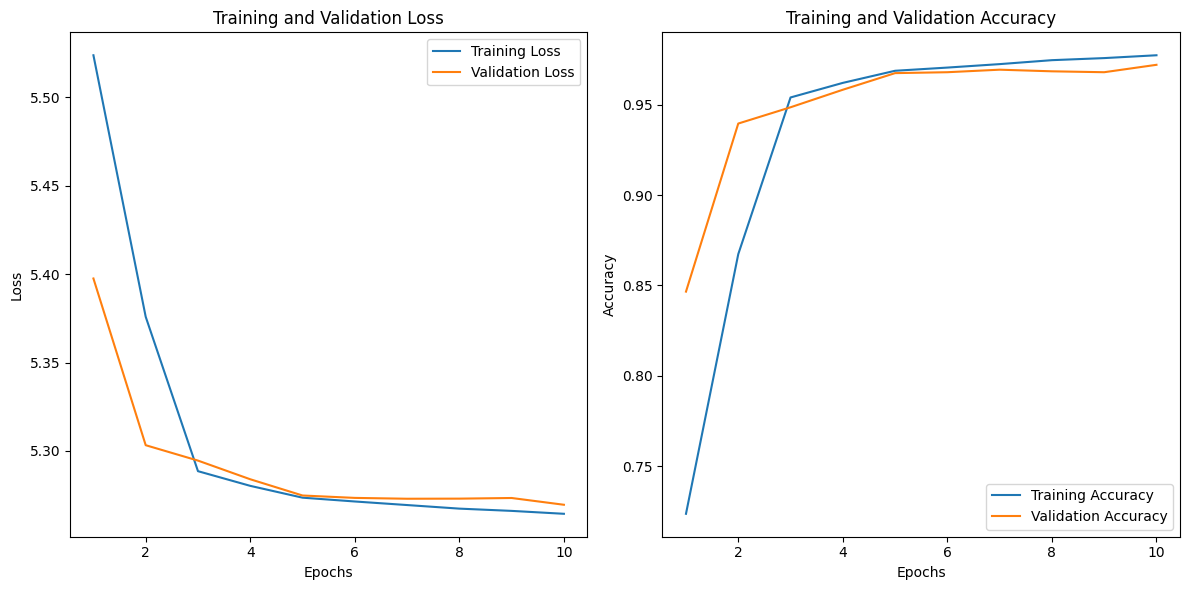

In [17]:
import matplotlib.pyplot as plt

# Assuming the train function is already defined and executed

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epoch + 1), train_loss, label='Training Loss')
plt.plot(range(1, epoch + 1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, epoch + 1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epoch + 1), val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Display the plots
plt.tight_layout()
plt.show()



In [15]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
